## Regresi贸n lineal por gradiente descendiente

### Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataframe = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'ModelYear', 'Origin']

raw_dataset = pd.read_csv(dataframe, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()


dataset.head(4)

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  ModelYear  \
0  18.0          8         307.0       130.0  3504.0          12.0         70   
1  15.0          8         350.0       165.0  3693.0          11.5         70   
2  18.0          8         318.0       150.0  3436.0          11.0         70   
3  16.0          8         304.0       150.0  3433.0          12.0         70   

   Origin  
0       1  
1       1  
2       1  
3       1

#### Verificamos valores vacios en el dataset.

In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

#### Eliminamos filas donde existen valores vacios.

In [5]:
dataset = dataset.dropna(axis = 0)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [6]:
dataset.shape

(392, 8)

#### Normalizamos los datos y creamos nuevo dataset

In [7]:
Displacement = dataset.iloc[:, 2].values
Horsepower = dataset.iloc[:, 3].values
Weight = dataset.iloc[:, 4].values
Acceleration = dataset.iloc[:, 5].values
ModelYear = dataset.iloc[:, 6].values
Origin = dataset.iloc[:, 7].values

MPG = dataset.iloc[:, 0].values


In [8]:
new_dataset = np.zeros((392,7))
new_dataset[:, 0] = Displacement
new_dataset[:, 1] = Horsepower
new_dataset[:, 2] = Weight
new_dataset[:, 3] = Acceleration
new_dataset[:, 4] = ModelYear
new_dataset[:, 5] = Origin
new_dataset[:, 6] = MPG
print(new_dataset[:5,:])

[[3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00 1.800e+01]
 [3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00 1.500e+01]
 [3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00 1.800e+01]
 [3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01 1.000e+00 1.600e+01]
 [3.020e+02 1.400e+02 3.449e+03 1.050e+01 7.000e+01 1.000e+00 1.700e+01]]


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_dataset = scaler.fit_transform(new_dataset)

In [10]:
norm_dataset.shape

(392, 7)

In [11]:
print(norm_dataset)

[[0.61757106 0.45652174 0.5361497  ... 0.         0.         0.2393617 ]
 [0.72868217 0.64673913 0.58973632 ... 0.         0.         0.15957447]
 [0.64599483 0.56521739 0.51686986 ... 0.         0.         0.2393617 ]
 ...
 [0.17312661 0.20652174 0.19336547 ... 1.         0.         0.61170213]
 [0.13436693 0.17934783 0.2869294  ... 1.         0.         0.50531915]
 [0.13178295 0.19565217 0.31386447 ... 1.         0.         0.58510638]]


### Regresi贸n lineal simple

In [12]:
print('Defining independent and dependent variable')
# x = dataset[['Displacement','Horsepower','Weight']].values

x = norm_dataset[:,0] #Displacement 
# x = x.reshape(392,1)
# x = norm_dataset['Horsepower'].values

y = norm_dataset[:,6] #MPG
# y = y.reshape(392,1)

Defining independent and dependent variable


In [13]:
x.shape

(392,)

Displaying data distribution


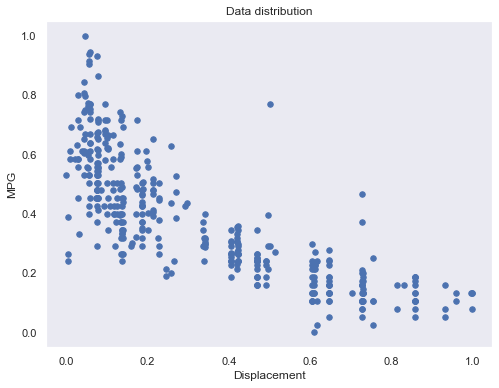

In [14]:
print('Displaying data distribution')
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y, s=30)
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid()
plt.show()

In [15]:
print('Initializing m and b')
m = 0 #theta0
b = 0 #theta1
# theta2 = 0
# theta3 = 0

Initializing m and b


In [16]:
print('Displaying the regression line before being trained')
x_line = np.linspace(0,10,100)
y_line = b + m*x_line 


Displaying the regression line before being trained


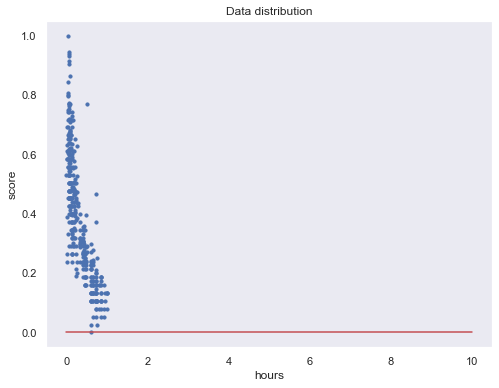

In [17]:
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y, s=10)
plt.plot(x_line,y_line, c='r')
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

In [18]:
print('Defining learning rate and the number of epochs')
L = 0.001
epochs = 15000

Defining learning rate and the number of epochs


In [19]:
print('Train the linear regression model')
# The number of samples in the dataset

Train the linear regression model


In [20]:
n = float(x.shape[0])

# An empty list to store the error in each epoch
losses = []
for i in range(epochs):
    yhat = m*x + b
    
    # Keeping track of the error decrease
    mse = (1/n) * np.sum((y - yhat)**2)
    losses.append(mse)
    
    # Derivatives
    dm = (-2/n) * np.sum(x * (y - yhat))
    db = (-2/n) * np.sum(y - yhat)
    
    # Values update
    m = m - L*dm   #theta0
    b = b - L*db   #theta1

Displaying linear regression line after training


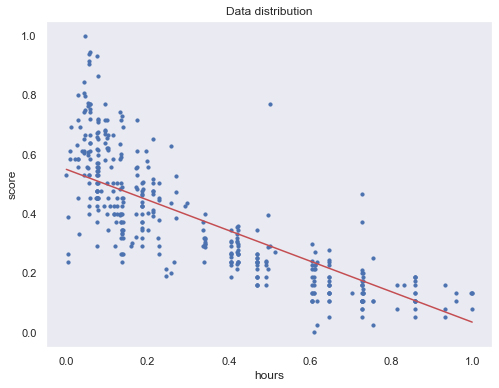

In [21]:
print('Displaying linear regression line after training')
x_line = np.linspace(0,1,100)
y_line = m*x_line + b
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(x, y, s=10)
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

Displaying loss value decrease
Initial loss	: 0.1905891352976229
Final loss	: 0.015896983434311843


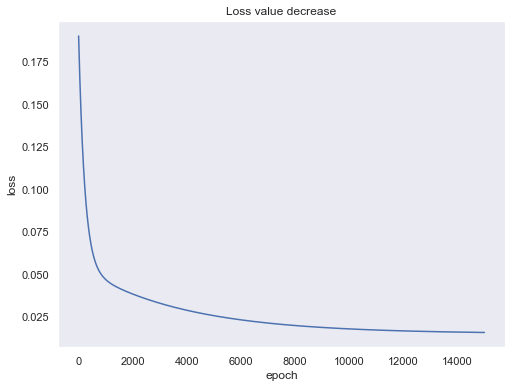

In [22]:
print('Displaying loss value decrease')
plt.figure(figsize=(8,6))
plt.title('Loss value decrease')
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
print('Initial loss\t:', losses[0])
print('Final loss\t:', losses[-1])
plt.grid()
plt.show()

### Regresi贸n lineal multivariable


In [23]:

norm_dataframe = pd.DataFrame({'Displacement': norm_dataset[:,0] ,
                  'Horsepower': norm_dataset[:, 1],
                  'Weight' : norm_dataset[:, 2],
                  'Acceleration' : norm_dataset[:, 3],
                  'ModelYear' : norm_dataset[:, 4],
                  'Origin' : norm_dataset[:, 5],
                  'MPG': norm_dataset[:, 6]})





In [24]:
norm_dataframe.head()

Displacement  Horsepower    Weight  Acceleration  ModelYear  Origin  \
0      0.617571    0.456522  0.536150      0.238095        0.0     0.0   
1      0.728682    0.646739  0.589736      0.208333        0.0     0.0   
2      0.645995    0.565217  0.516870      0.178571        0.0     0.0   
3      0.609819    0.565217  0.516019      0.238095        0.0     0.0   
4      0.604651    0.510870  0.520556      0.148810        0.0     0.0   

        MPG  
0  0.239362  
1  0.159574  
2  0.239362  
3  0.186170  
4  0.212766

In [25]:
print('Defining independent and dependent variable')
x1 =norm_dataframe['Horsepower'].values
x2 = norm_dataframe['Displacement'].values
x3 =norm_dataframe['Weight'].values
y = norm_dataframe['MPG'].values

Defining independent and dependent variable


In [26]:
y.shape

(392,)

Displaying data distribution


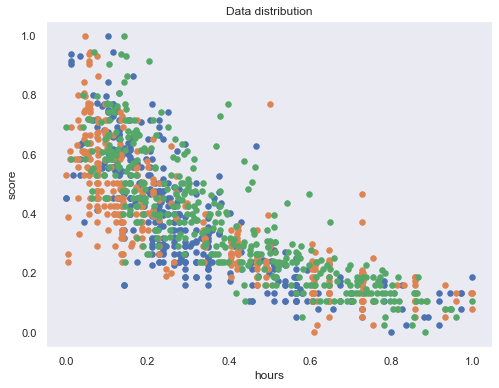

In [27]:
print('Displaying data distribution')
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x1,y, s=30)
plt.scatter(x2,y, s=30)
plt.scatter(x3,y, s=30)
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

In [28]:
print('Initializing m and b')
theta0 = 0 #b
theta1 = 0 #m
theta2 = 0
theta3 = 0

Initializing m and b


In [29]:
print('Displaying the regression line before being trained')
x_line = np.linspace(0,10,100)
y_line = theta0 + theta1*x_line + theta2*x_line + theta3*x_line

Displaying the regression line before being trained


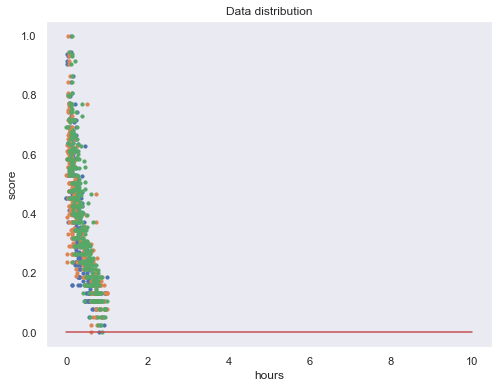

In [30]:
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x1, y, s=10)
plt.scatter(x2, y, s=10)
plt.scatter(x3, y, s=10)
plt.plot(x_line,y_line, c='r')
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

In [31]:
print('Defining learning rate and the number of epochs')
L = 0.002
epochs = 15000

Defining learning rate and the number of epochs


In [32]:
print('Train the linear regression model')
# The number of samples in the dataset

Train the linear regression model


In [33]:
n = np.float(x.shape[0])
# An empty list to store the error in each epoch
losses = []
for i in range(epochs):
    yhat = theta0 + theta1*x1 + theta2*x2 + theta3*x3


    # Keeping track of the error decrease
    mse = (1/n) * np.sum((y - yhat)**2)
    losses.append(mse)
    
    # Derivatives
    dtheta0 = (-2/n) * np.sum(y - yhat)
    dtheta1 = (-2/n) * np.sum(x1 * (y - yhat))
    dtheta2 = (-2/n) * np.sum(x2 * (y - yhat))
    dtheta3 = (-2/n) * np.sum(x3 * (y - yhat))
    
    # Values update
    # m = m - L*dm
    # b = b - L*db
    theta0 = theta0 - L*dtheta0
    theta1 = theta1 - L*dtheta1
    theta2 = theta2 - L*dtheta2
    theta3 = theta3 - L*dtheta3

C:\Users\danie\AppData\Local\Temp/ipykernel_6236/3349656674.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n = np.float(x.shape[0])


In [34]:
print(theta0)
print(theta1)
print(theta2)
print(theta3)

0.6384590911545522
-0.18053900689842126
-0.26624297880971676
-0.2844595741006473


Displaying linear regression line after training


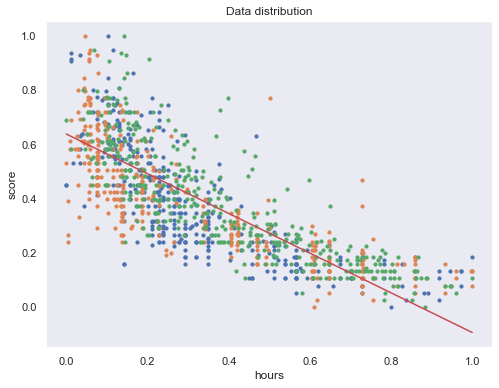

In [35]:
print('Displaying linear regression line after training')
x_line = np.linspace(0,1,100)
y_line = theta0 + theta1*x_line + theta2*x_line + theta3*x_line
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.plot(x_line, y_line, c='r')
plt.scatter(x1, y, s=10)
plt.scatter(x2, y, s=10)
plt.scatter(x3, y, s=10)
plt.xlabel('hours')
plt.ylabel('score')
plt.grid()
plt.show()

Displaying loss value decrease
Initial loss	: 0.1905891352976229
Final loss	: 0.012975291487526132


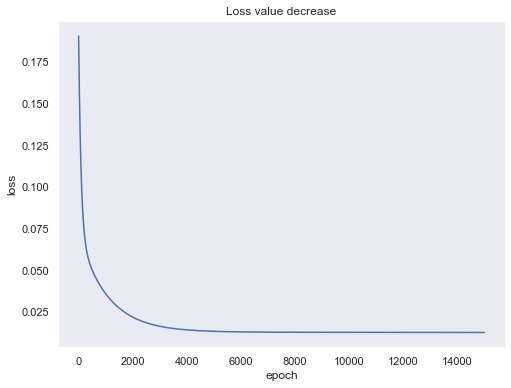

In [36]:
print('Displaying loss value decrease')
plt.figure(figsize=(8,6))
plt.title('Loss value decrease')
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
print('Initial loss\t:', losses[0])
print('Final loss\t:', losses[-1])
plt.grid()
plt.show()